# Coursework 1 #

There are three questions below, each associated to one of the core modules, Analytical and Computational Foundations (ACF), Calculus (CAL) and Linear Mathematics (LMA).

### Marks 
- Each of the question is worth in total 15 marks. 
- The marks are divided amongst different sub-questions and a certain number of marks is assigned to a particular test or task. 
- The number of marks asssociated with test-cell is indicated in a comment at the top of that cell.
- The number of marks associated to a manually marked taks. (like drawing a graph) is indicated in the text immediately above this cell. 

#### How to Answer
Write your code in the "answer" cell where it says "# YOUR CODE HERE"
and remove both the line "# YOUR CODE HERE" and the line "raise NotImplementedError()"

**Important**: Do not change the name or remove the existing function and write all your code "inside" the existing function, i.e. with at least one-tab's indentation.


When you have written your code you should evaluate the cell and then evaluate the "Test" cells following it. If you don't see any errors then your code is (hopefully) correct and you can go on to the next question. 

If you see some errors then you have to go back and edit your code and try to fix the "bug". 



## Question 1 [ACF]

The Babylonian (or Heron’s) method for computing the square root of 
$a\in\mathbb{R}^{+}$ is summarised by the iterative sequence $(x_{n})$, where $x_{0}$ is an arbitrary starting value (ideally, $x_{0}\approx\sqrt{a}$, but this is not required) and 
$$
x_{n+1}=\frac{1}{2}\left(x_{n}+\frac{a}{x_{n}}\right).
$$

Successive values are computed for $x_{n}$ until the desired level of accuracy is reached. Hence, if we desire the maximum error to be $\varepsilon$, we stop when $n=N$, where 
$$
\left|x_{N}^{2}-a\right|<\varepsilon.
$$

**a)**

Write a Python function called ‘babylonian_square_root' that 
- Takes as input three numbers $a$, $\varepsilon$ and $x_{0}$. 
- Raises an assertion error if $a$ or $\varepsilon$ are not positive numbers.
- Uses the Babylonian method to estimate $\sqrt{a}$ with maximum error $\varepsilon$. 
- Returns the tuple $(x_{N},N)$ where $x_{N}$ is the sought approximation.

<p style="text-align: right"> <b>[7 marks]</b> </p>

In [1]:
def babylonian_square_root(a,epsilon,x0):
    import math
    assert (a>0);"Value of a cannot be negetive"
    assert (epsilon>0);"Value of epsilon cannot be negetive"
    num=abs(x0)
    x0=abs(x0)
    array=[]
    n=(-epsilon+a)
    m=(epsilon+a)
    i=0
    while(i>=0):
        xi=0.5*(x0+(a/x0))
        if (n<x0**2<m):
            break
        x0=xi
    xN=x0
    N=i+1
    t=(xN,N)
    return t

In [2]:
# [5 marks]
from nose.tools import assert_equal,assert_almost_equal

# Check that the function returns a tuple
assert_equal(type(babylonian_square_root(2.0,1e-10,1)),tuple)
# Check that the function returns a tuple of length 2
assert_equal(len(babylonian_square_root(2.0,1e-10,1)),2)
# Check that we return sqrt(2) if we start with 1
assert_almost_equal(babylonian_square_root(2.0,1e-10,1)[0],1.4142135623730951,8)  
# check that we return sqrt(2) also for starting with -1 
assert_almost_equal(babylonian_square_root(2.0,1e-10,-1)[0],1.4142135623730951,8)  

In [3]:
# [2 marks]
from nose.tools import assert_raises

assert_raises(AssertionError,babylonian_square_root,-2,1e-10,1)

**b)** 
Write a modified function that returns the whole list of approximations $[x_0,x_1,x_2,\ldots,x_n]$. <p style="text-align: right"> **[3 marks]** </p>

In [4]:
def babylonian_square_root_list(a,epsilon,x0):
    import math
    assert (a>0);"Value of a cannot be negetive"
    assert (epsilon>0);"Value of epsilon cannot be negetive"
    num=abs(x0)
    x0=abs(x0)
    array=[]
    array1=[]
    array2=[]
    n=(-epsilon+a)
    m=(epsilon+a)
    i=1
    while(i>0):
        xi=0.5*(x0+(a/x0))
        if (n<x0**2<m):
            xN=x0
            break
        else:
            array.append(x0)
            x0=xi
    array.insert(len(array),xN)
    return array


In [5]:
# [3 marks]
from nose.tools import assert_equal,assert_almost_equal

# Check that the function returns a list
assert_equal(type(babylonian_square_root_list(2.0,1e-10,1)),list)
# Check that the first element is the initial element 
assert_almost_equal(babylonian_square_root_list(2.0,1e-10,1)[0],1.0,8)  
# Check that the last element in the list is a good approximation
assert_almost_equal(babylonian_square_root_list(2.0,1e-10,1)[-1],1.4142135623730951,8)  

**c)** Use the function from part b) to compute a list of approximations $(x_n)$ to $\sqrt{20000}$ and use **pyplot** to plot the points $x_n$ against $n$ as a scatterplot and in the same plot also add a horizontal red line corresponding to the value given by `math.sqrt(20000)` as well as appropriate legends for the plot and labels for the $x$ and $y$ axes. Please insert the plot in the cell below the function definition.  <p style="text-align: right"> **[5 marks]** </p>

In [6]:
import matplotlib.pyplot as plt
def draw_plot(a):
    data = babylonian_square_root_list(a,1e-10,1)
    import math
    array3=[]
    for q in range(0,len(data)):
        n=q
        array3.append(n)
    plt.axhline(math.sqrt(20000), color='r',label=(math.sqrt(20000)))
    plt.xlabel('whole numbers(n)')
    plt.ylabel('corresponding xn')
    plt.scatter(array3,data,label='xn for corresponding values of x')
    plt.legend()
    plt.show()

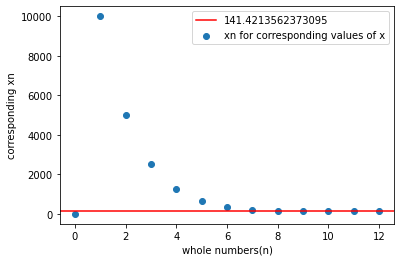

In [7]:
draw_plot(20000)


## Question 2 [CAL]
The Bernoulli numbers $B_{m}$, where $m=0,1,2,\ldots$ are a sequence of rational numbers with many applications. 
The $m$th Bernoulli number can be defined explicitly by 
$$
B_{m}=\sum_{k=0}^{m}\sum_{v=0}^{k}(-1)^{v}{k \choose v}\frac{v^{m}}{k+1}.
$$

It is easy to see that $B_0=1$ and it can be shown that $B_{m}=0$ for any odd $m>1$ and the first few non-zero values are

$$
B_0=1,\quad B_1=-\frac{1}{2},\quad B_2=\frac{1}{6}=0.166666\ldots, \quad B_4=-\frac{1}{30}=-0.033333\cdots
$$

**a)** Write a program which uses the formula above to compute the Bernoulli number $B_{m}$ for $0\le m\le 12$. 

Note that without using higher precision this algorithm is not very good for large $m$ due to catastrophic cancellation.

- Hint 1: the binomial coefficient ${k \choose v}$ is given by `math.comb(k,v)`.
- Hint 2: watch the indexes!

<p style="text-align: right"> <b>[5 marks]</b> </p>

In [8]:
import math
def bernoulli(m):
    r"""
    A function that uses the `sum` formula to compute $B_m$
    """
    sum=0
    for k in range(0,m+1):
        for v in range(0,k+1):
            p=((-1)**v)*(math.comb(k,v))*((v**m)/(k+1))
            sum=sum+p
    return sum

In [9]:
# [5 marks]
from nose.tools import assert_equal,assert_almost_equal

assert_equal(bernoulli(0),1)
assert_equal(bernoulli(1),-0.5)
assert_almost_equal(bernoulli(2),0.166666666666666,6)
assert_almost_equal(bernoulli(11),0.0,4)
# Note that we only assume that the precision for B_{12} here is 2 digits.
assert_almost_equal(bernoulli(12),-0.253113553113553,2)  

**b)**
The first n terms of the Maclaurin series of tan x are given by 

$$
p_n(x) = \sum_{k=1}^{n} \frac{B_{2k}}{(2k)!}(−4)^k(1 − 4^k)x^{2k−1}
$$

Write a function to calculate $p_n(x)$ that works for at least $n=1,2,3$. <p style="text-align: right"> **[5 marks]** </p>

In [10]:
import math
def pn(n,x):
    r"""
    Function that computes the $n$-th McLaurin polynomials for $\tan$ at the point $x$. 
    """
    sum1=0
    for k in range(1,n+1):
        m=2*k
        g=bernoulli(2*k)
        f=(g/math.factorial(2*k))*((-4)**k)*(1-(4**k))*(x**(2*k-1))
        sum1=sum1+f
    return sum1
def bernoulli(m):
    sum=0
    for k in range(0,m+1):
        for v in range(0,k+1):
            p=((-1)**v)*(math.comb(k,v))*((v**m)/(k+1))
            sum=sum+p
    return sum

In [11]:
# [5 marks]
from nose.tools import assert_equal,assert_almost_equal

assert_almost_equal(pn(1,0.5),0.5,8)
assert_almost_equal(pn(2,0.5),0.54166666666666,8)
assert_almost_equal(pn(3,0.5),0.54583333333333,8)

**c)** 
Plot the graphs of $\tan(x)$, $p_1(x)$, $p_2(x)$ and $p_3(x)$ in the range 
$-\frac{\pi}{3}\le x\le \frac{\pi}{3}$
in the same figure. The figure should have a legend that explains what each of the graphs represent as well as labels for the $x$ and $y$ axes. Please insert the plot in the cell below the function definition. <p style="text-align: right"> **[5 marks]** </p>

In [12]:
import matplotlib.pyplot
def draw_pn_plot():
    r"""
    Function that plots the graphs of \tan, p_1, p_2 and p_3
    """
    import math
    import numpy as np
    y1=[]
    y2=[]
    y3=[]
    x=np.arange(-(np.pi/3),(np.pi/3)+0.1,0.1)
    for i in range(0,len(x)):
        j=pn(1,x[i])
        y1.append(j)
    for i in range(0,len(x)):
        j=pn(2,x[i])
        y2.append(j)
    for i in range(0,len(x)):
        j=pn(3,x[i])
        y3.append(j)
    plt.xlabel('Values of x')
    plt.ylabel('Corresponding value of tanx')
    plt.plot(x,y1,label='p1(x)')
    plt.plot(x,y2,label='p2(x)')
    plt.plot(x,y3,label='p3(x)')
    plt.legend(loc=0)
    plt.show()

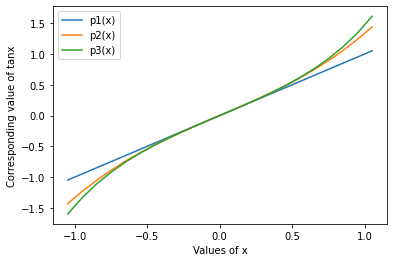

In [13]:
draw_pn_plot()

## Question 3 [LMA]

For this question we will deal with geometry of the plane and we will use tuples to denote points and vectors. 
More precisely, if $\bf{v}$ is a vector or point in the plane we represent it by the tuple of coordinates $\mathbf{v}=(x,y)$. A similar representation can of course be used for vectors in arbitrary dimensions. 

We know that a straight line $L$ in the plane is uniquely determined by either of the following:

- Two different points $P$ and $Q$ that lie on the line. 
- A point $P$ on the line together with a direction vector $\bf{v}$

and we will make use of both of these definitions. 


**a)** Write a function that computes the scalar product of two vectors of arbitrary but equal length.  
           The function should Raise an assertion error if the input are not tuples of equal length containing integers or floats. <p style="text-align: right"> **[5 marks]** </p>

In [14]:
def scalar_product(v1,v2):
    r"""
    Calculate the scalar (dot) product between two vectors, v1 and v2, of arbitrary length.
    """ 
    assert type(v1)==tuple;"v1 must be a tuple"
    assert type(v2)==tuple;"v2 must be a tuple"
    assert len(v1)==len(v2);"The lenght of the two vectors must be equal"
    for j in range(0,len(v1)):
        assert isinstance(v1[j],(int,float));"The values in the tuples is not integer or float"
        assert isinstance(v2[j],(int,float));"The values in the tuples is not integer or float"
    
    sum=0
    for i in range(0,len(v1)):
        p=v1[i]*v2[i]
        sum=sum+p
    return(sum)

In [15]:
# [3 marks]
# Check that correct output is returned
from nose.tools import assert_equal
assert_equal(scalar_product((1,2,0),(-2,1,-1)),0)
assert_equal(scalar_product((1,2,1),(-2,1,-1)),-1)
assert_equal(scalar_product((1,2,1),(0,0,1)),1)

In [16]:
# [2 marks]
# Check that incorrect input is handled by raising error
from nose.tools import assert_raises

assert_raises(AssertionError,scalar_product,1,2) # not tuples as inout
assert_raises(AssertionError,scalar_product,(1,1,2),(1,2)) # tuples of different lengths
assert_raises(AssertionError,scalar_product,(1,2),("1",2)) # input are not all floats or ints

**b)** Write a program that takes as input two points $P$ and $Q$ in the plane and returns a vector that is perpendicular to the line through $P$ and $Q$ and has length equal to 1. <p style="text-align: right"> **[5 marks]** </p>

In [17]:
def vector_perpendicular(P,Q):
    """
    Find a vector that is perpendicular to the line between two points P and Q in the plane.  
    """
    v=[]
    array=[]
    for i in range(0,len(P)):
        m=Q[i]-P[i]
        v.append(m)
    if v[1]==0:
        b=v[0]**2/(v[0]**2+v[1]**2)
        a=(-b*v[1])/v[0]
    else:
        a=v[1]**2/(v[0]**2+v[1]**2)
        b=(-a*v[0])/v[1]
    if a==0 or b==0:
        a=abs(a)
        b=abs(b)
    
    t=(a,b)
    return t

In [18]:
# [5 marks]
# Test that checks the function produces a vector that is orthogonal to the line.
from nose.tools import assert_equal,assert_almost_equal
def are_orthogonal(v,w):
    """
    Simple check to see if the two vectors v and w are orthogonal up to precision 1e-10.
    """
    return abs(v[0]*w[0]+v[1]*w[1])<1e-10

assert_equal( are_orthogonal(vector_perpendicular((0,1),(1,1)),(1,0)),True) 
assert_equal( are_orthogonal(vector_perpendicular((1,2),(1,3)),(0,1)),True)

**c)** 
Write a function that computes the point of intersection between two lines in the plane given in the format $(P,\mathbf{v})$ where $P$ is a point and $\mathbf{v}$ a vector (both given by tuples of length 2). If the lines are parallell then the function should raise an AssertionError. 

Hint: If we are given the lines in parameter format
$$
L_1: s\mapsto  P_1 + s\mathbf{v}_1 \quad L_2: t\mapsto P_2 + t\mathbf{v}_2
$$

then we need to solve the linear system of equations $L_1(s)=L_2(t)$ for $s$ and $t$.
If $P_i=(a_i,c_i)$ and $\mathbf{v}_i = (b_i,d_i)$ then the system of equations take the form:

$$
   a_1 + b_1 s = a_2 + b_2 t\\
   c_1 + d_1 s = c_2 + d_2 t
$$

and the aim is to find $s$ and $t$ in terms of the other coefficients. 
You also need to find out how you can tell from the coefficients if the two lines are parallel or not. <p style="text-align: right"> **[5 marks]** </p>

In [19]:
def intersection_lines(L1,L2):
    """
    Find the intersection point of the two lines L1 and L2 given by two tuples L1=(P1,v1) and L2=(P2,v2) 
    where the points P1, P2 and the vectors v1 and v2 are all represented by tuples of length 2. 
    
    If the vectors v1 and v2 are parallell then we raise an assertion error. 
    """
    p1=L1[0]
    p2=L2[0]
    v1=L1[1]
    v2=L2[1]
    assert (v1[0]*v2[0]+v1[1]*v2[1]!=(math.sqrt(v1[0]**2+v1[1]**2))*(math.sqrt(v2[0]**2+v2[1]**2)));"The given lines L1 and L2 are parallel"
    t= ((v1[0]*(p1[1]-p2[1]))+(v1[1]*(p2[0]-p1[0])))/((v1[0]*v2[1])-(v2[0]*v1[1]))
    s=((p2[0]-p1[0])+(v2[0]*t))/v1[0]
    x=p1[0]+v1[0]*s
    y=p1[1]+v1[1]*s
    Q1=[x,y]
    return Q1

In [20]:
# [3 marks]
from nose.tools import assert_equal
assert_equal(intersection_lines(((1,1),(1,1)),((1,1),(0,1))),[1.0,1.0])
assert_equal(intersection_lines(((1,-2),(1,1)),((1,1),(0,1))),[1.0,-2.0])

In [21]:
# [2 marks]
from nose.tools import assert_raises
assert_raises(AssertionError,intersection_lines,((1,0),(0,1)),((1,1),(0,1)))
assert_raises(AssertionError,intersection_lines,((1,0),(1,0)),((1,1),(2,0)))